# Logistic Regression

Output variable-->y || y--> Whether the client has subscribed a term deposit or not || Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectFromModel

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('bank-full.csv',sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [9]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Model Building

In [11]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [12]:
from sklearn import preprocessing

In [13]:
label=preprocessing.LabelEncoder()
df['job']=label.fit_transform(df.job)
df['marital']=label.fit_transform(df.marital)
df['education']=label.fit_transform(df.education)
df['default']=label.fit_transform(df.default)
df['housing']=label.fit_transform(df.housing)
df['loan']=label.fit_transform(df.loan)
df['contact']=label.fit_transform(df.contact)
df['poutcome']=label.fit_transform(df.poutcome)
df['month']=label.fit_transform(df.month)
df['y']=label.fit_transform(df.y)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [14]:
x=df.iloc[:,:16]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [15]:
y=df.iloc[:,16:17]

In [16]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [17]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

# Model Predictions

In [18]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
df['y_pred']=y_pred
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


# Testing Model

In [20]:
con_mat=confusion_matrix(y,y_pred)
con_mat

array([[39279,   643],
       [ 4437,   852]], dtype=int64)

In [21]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

The Model accuracy is 89.18%

# ROC Curve plot

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

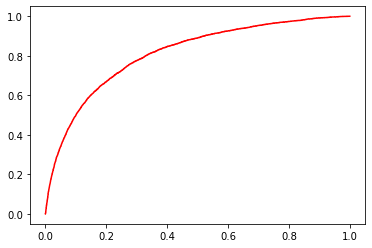

In [23]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

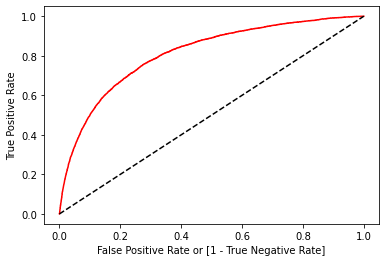

In [24]:
plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [25]:
print('auc accuracy:',auc)

auc accuracy: 0.5724913226281891


In [26]:
import statsmodels.api as smf
model=smf.Logit(y,x)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Thu, 01 Sep 2022   Pseudo R-squ.:                  0.2342
Time:                        18:54:36   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""